In [3]:
import os
import PIL.Image as pilmg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mp

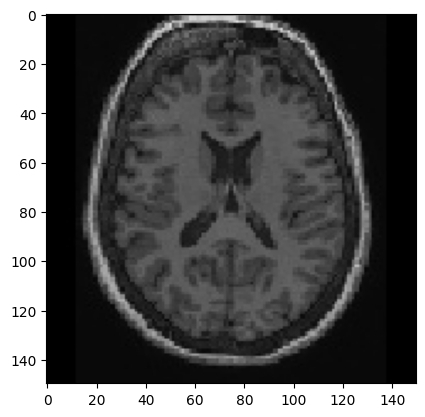

In [4]:
img=pilmg.open('C:\\Users\\M\\Downloads\\Bigdata\\brain\\train\\normal\\normal_test_1.jpg')
img_arr=np.array(img)
plt.imshow(img_arr)

In [7]:
# 정상뇌과 비정상뇌의 이미지를 분류하는 Convolutional network model을 학습하시오

In [8]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [9]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,206,209 (73.27 MB)

 Trainable params: 19,206,209 (73.27 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
#이미지 스케일 변형
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [13]:
#이미지 불러오는 객체
train_data_importer=train_datagen.flow_from_directory('C:\\Users\\M\\Downloads\\Bigdata\\brain\\train\\',
  target_size=(150,150),
  batch_size=5,
  class_mode='binary'    
)

Found 160 images belonging to 2 classes.


In [14]:
test_data_importer=test_datagen.flow_from_directory('C:\\Users\\M\\Downloads\\Bigdata\\brain\\test\\',
  target_size=(150,150),
  batch_size=5,
  class_mode='binary'    
)

Found 120 images belonging to 2 classes.


In [16]:
hist=model.fit(train_data_importer,epochs=5,validation_data=test_data_importer)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 232ms/step - accuracy: 0.5905 - loss: 0.6865 - val_accuracy: 0.6750 - val_loss: 0.5776
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 248ms/step - accuracy: 0.6997 - loss: 0.6685 - val_accuracy: 0.7250 - val_loss: 0.5867
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 237ms/step - accuracy: 0.8673 - loss: 0.3507 - val_accuracy: 0.8250 - val_loss: 0.4741
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 226ms/step - accuracy: 0.8595 - loss: 0.3770 - val_accuracy: 0.9750 - val_loss: 0.1509
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - accuracy: 0.9342 - loss: 0.1680 - val_accuracy: 0.9333 - val_loss: 0.1131


In [17]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,206,274 (73.27 MB)

 Trainable params: 19,206,274 (73.27 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#loss = 'sparse_categorical_crossentropy
#multiclassification에서 y값이 label encoding으로 들어오는 값을 내부에서 one hot으로 처리

In [20]:
hist=model.fit(train_data_importer,epochs=5,validation_data=test_data_importer)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 185ms/step - accuracy: 0.5046 - loss: 0.7141 - val_accuracy: 0.5000 - val_loss: 0.6887
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 188ms/step - accuracy: 0.6809 - loss: 0.6688 - val_accuracy: 0.6417 - val_loss: 0.5692
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - accuracy: 0.7892 - loss: 0.4787 - val_accuracy: 0.9500 - val_loss: 0.1181
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 178ms/step - accuracy: 0.9489 - loss: 0.1698 - val_accuracy: 0.9833 - val_loss: 0.0599
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 176ms/step - accuracy: 0.9713 - loss: 0.0630 - val_accuracy: 0.8667 - val_loss: 0.3614


In [22]:
#다양한 학습을 위한 데이터 변형
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40, # 40도 이내에서 random하게 이미지를 회전시킨다
    width_shift_range=0.2, # 20% 이내에서 이미지를 좌우 이동
    height_shift_range=0.2,
    shear_range = 0.2,  # 20% 이내에서 이미지를 기울인다
    zoom_range=0.2, # 20% 이내에서 이미지를 확대 축소
    horizontal_flip=True,  # 이미지를 좌우 반전
    vertical_flip=True) # 이미지를 상하 반전

In [23]:
#이미지 불러오는 객체
train_data_importer=train_datagen.flow_from_directory('C:\\Users\\M\\Downloads\\Bigdata\\brain\\train\\',
  target_size=(150,150),
  batch_size=5,
  class_mode='binary'    
)

Found 160 images belonging to 2 classes.


In [24]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,206,274 (73.27 MB)

 Trainable params: 19,206,274 (73.27 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
hist=model.fit(train_data_importer,epochs=5,validation_data=test_data_importer)

Epoch 1/5


c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 187ms/step - accuracy: 0.5182 - loss: 0.7686 - val_accuracy: 0.6083 - val_loss: 0.6929
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 199ms/step - accuracy: 0.5010 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 214ms/step - accuracy: 0.5226 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6922
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 208ms/step - accuracy: 0.5385 - loss: 0.6915 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 201ms/step - accuracy: 0.5662 - loss: 0.6921 - val_accuracy: 0.5500 - val_loss: 0.6928


In [38]:
# transfer learning
from tensorflow.keras.applications import EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150,150,3))  # dense layer는 제외하고 import
#base_model.trainable = False  # base_model의 parameter는 추가학습하지 않음..

In [39]:
transfer_model = Sequential()
transfer_model.add(base_model)
transfer_model.add(Flatten())
transfer_model.add(Dense(512, activation='relu'))
transfer_model.add(Dense(256, activation='relu'))
transfer_model.add(Dense(128, activation='relu'))
transfer_model.add(Dense(60, activation='relu'))
transfer_model.add(Dense(30, activation='relu'))
transfer_model.add(Dense(10, activation='relu'))
transfer_model.add(Dense(2, activation='softmax'))  # binary cls

In [40]:
train_datagen = ImageDataGenerator(
    rescale = 1./255)

In [41]:
#이미지 불러오는 객체
train_data_importer=train_datagen.flow_from_directory('C:\\Users\\M\\Downloads\\Bigdata\\brain\\train\\',
  target_size=(150,150),
  batch_size=5,
  class_mode='binary'    
)

Found 160 images belonging to 2 classes.


In [42]:
transfer_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
hist = transfer_model.fit(
    train_data_importer,
    epochs=5,
    validation_data=test_data_importer
)

Epoch 1/5


32/32 ━━━━━━━━━━━━━━━━━━━━ 58s 493ms/step - accuracy: 0.6656 - loss: 0.8214 - val_accuracy: 0.5000 - val_loss: 1.3599
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 391ms/step - accuracy: 0.7861 - loss: 0.6952 - val_accuracy: 0.5000 - val_loss: 0.7286
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 394ms/step - accuracy: 0.9493 - loss: 0.2227 - val_accuracy: 0.5000 - val_loss: 0.8161
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 393ms/step - accuracy: 0.9511 - loss: 0.2008 - val_accuracy: 0.5000 - val_loss: 1.7145
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 385ms/step - accuracy: 0.9263 - loss: 0.2394 - val_accuracy: 0.5000 - val_loss: 0.7650
